# Generate and save the LCO spectrum for Bruce

In [1]:
%matplotlib notebook

In [2]:
# imports
from astropy.table import Table
from specdb.specdb import UVQS

## Load up UVQS

In [3]:
uvqs = UVQS()

Database is uvqs
Created on 2017-Mar-13
Version: v01


## Grab the spectrum

In [4]:
spec,meta = uvqs.spectra_from_coord('J060819.93-715737.4')

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 1 spectra totalling 0.00048 Gb
Loaded spectra


/home/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:254: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


In [5]:
meta

DEC_GROUP,FUV,NUV,OBJ,OBJ_IDX,OBJ_IDX2,RA_GROUP,SPEC_QUAL,THETA [20],W1,W2,Z,Z_QUAL,Z_SIG,CAND,zem_GROUP,sig_zem,UVQS_ID,NPIX,WV_MIN,WV_MAX,R,GROUP_ID,EPOCH,NAME,OBSV,OBS_DATE,SCI_FILE,SCND_FILE,ZASS_FIL,comment,dbx_path,instr,SPEC_FILE,FINDER,flag_zem,STYPE,DATE-OBS,DISPERSER,TELESCOPE,INSTR,GROUP
float64,float64,float64,int64,int64,int64,float64,int64,float64,float64,float64,float64,int64,float64,int64,float64,float64,int64,int64,float64,float64,float64,int64,float64,str23,str8,str9,str46,str38,str29,str1,str16,str5,str37,str32,str4,str3,str10,str8,str8,str11,str3
-71.96039,16.0868873596,15.6083278656,0,0,0,92.08304,4,100.814071655 .. 0.0,13.1510000229,11.1149997711,0.00108595693018,4,0.0,1,0.001,0.0,424,2039,3664.9,6820.0,1200.0,424,2000.0,UVQSJ060819.93-715737.4,LCO,Feb2015,14feb2015/Science/sci-ccd0059.fits.gz,,LCO_14feb2015_zassess.fits,,LCO/February2015,BCS,UVQSJ060819.93-715737.4_LCO.fits,UVQSJ060819.93-715737.4_DSS.pdf,UVQS,QSO,2015-02-14,600/5000,duPont,duPont-BCS,FUV


## Plot

<IPython.core.display.Javascript object>


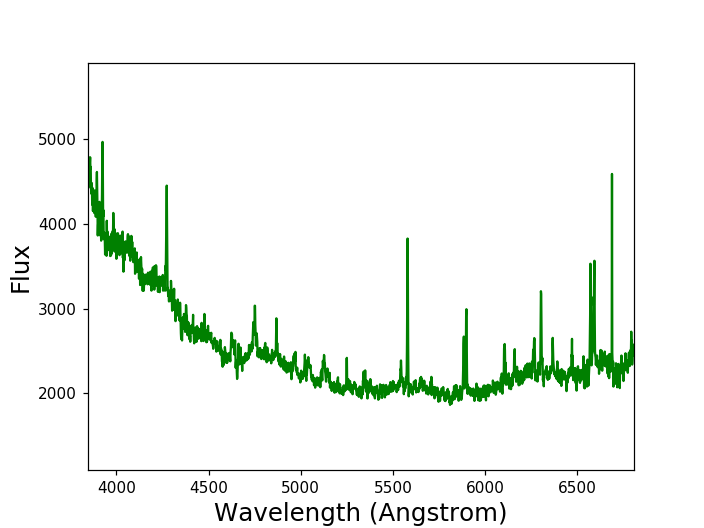

In [10]:
spec.plot()

## Write the error array as a pseudo-sky

### Convert to air!

In [6]:
spec.vactoair()

### Table

In [22]:
stbl = Table()

In [23]:
stbl['wave'] = spec.wavelength.value
stbl['flux'] = spec.flux.value

In [24]:
stbl['sig'] = spec.sig.value

In [21]:
stbl

wave,sky
float64,float32
3663.86353736,5768.12
3665.39031814,5923.59
3666.9173671,5935.01
3668.44423971,6291.39
3669.97126104,5727.69
3671.4981706,6123.92
3673.02524692,6224.0
3674.55238407,6184.87
3676.07946186,5932.85


### Write

In [27]:
stbl.write('spec_for_bruce_air.csv', format='ascii.csv')

### Write FITS

In [7]:
spec.write_to_binary_fits_table('spec_air.fits')

Wrote spectrum to spec_air.fits


/home/xavier/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/ma/core.py:3008: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a structured
array. This code will likely break in a future numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  if (obj.__array_interface__["data"][0]
/home/xavier/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/numpy/ma/core.py:3009: FutureWarning: Numpy has detected that you (may be) writing to an array returned
by numpy.diagonal or by selecting multiple fields in a structured
array. This code will likely break in a future numpy release --
see numpy.diagonal or arrays.indexing reference docs for details.
The quick fix is to make an explicit copy (e.g., do
arr.diagonal().copy() or arr[['f0','f1']].copy()).
  != se